# <h1><center>**Final Project for the first year**</center></h1>

## <h1><center>1.Разведывательный анализ данных</center></h1>
| Всех вам благ | ![alt text ><](Диаграммы/1676722613_gas-kvas-com-p-razvedchik-detskii-risunok-1.png)





In [74]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
from tqdm import tqdm
import geopandas as gpd
import shapely
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from shapely.ops import snap, unary_union
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon
import plotly.graph_objects as go
from shapely.geometry import Point
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn import metrics
from sklearn import mixture

In [75]:
# Загрузка данных
region_database = pd.read_csv('all_database.csv')
region_database

region  social_policy_2015  social_policy_2016  \
0                    Алтайский край                18.8                20.4   
1                  Амурская область                19.2                28.9   
2             Архангельская область                15.4                16.3   
3              Астраханская область                18.8                20.5   
4              Белгородская область                11.3                11.8   
..                              ...                 ...                 ...   
80  Ямало-Ненецкий автономный округ                13.1                12.0   
81              Ярославская область                16.0                18.0   
82                        г. Москва                17.7                16.6   
83               г. Санкт-Петербург                13.8                12.6   
84                   г. Севастополь                12.2                10.5   

    social_policy_2017  social_policy_2018  social_policy_2019  \
0                 30.9                29.8                28.3   
1                 26.3                24.1                22.7   
2                 24.8                24.2                22.4   
3                 27.7                26.4                25.8   
4                 16.4                15.6                13.8   
..                 ...                 ...                 ...   
80                14.0                14.0                13.0   
81                23.3                22.5                22.3   
82                15.8                17.1                17.2   
83                12.8                17.0                18.4   
84                13.3                14.1                13.2   

    social_policy_2020   2000   2001    2002  ...  \
0                 29.7   9221  12280   15839  ...   
1                 21.7  12303  14786   17229  ...   
2                 21.4  11845  17821   21924  ...   
3                 31.4  10876  14265   17668  ...   
4                 16.1  11820  13837   16366  ...   
..                 ...    ...    ...     ...  ...   
80                12.6  26138  34725   43664  ...   
81                23.5  10103  12743   15843  ...   
82                17.5  68083  86968  100184  ...   
83                19.8  18292  23892   29814  ...   
84                13.3      0      0       0  ...   

    В состоянии алкогольного опьянения 2021  \
0                                     58144   
1                                     19887   
2                                     21488   
3                                     15642   
4                                     13922   
..                                      ...   
80                                     9356   
81                                    14818   
82                                    40871   
83                                    18735   
84                                     6379   

    В состоянии наркотического опьянения 2021  \
0                                         353   
1                                         604   
2                                         190   
3                                         584   
4                                         561   
..                                        ...   
80                                        280   
81                                       1014   
82                                       5040   
83                                       4378   
84                                        352   

    В состоянии токсического опьянения 2021  \
0                                         0   
1                                        25   
2                                         0   
3                                         4   
4                                         0   
..                                      ...   
80                                        1   
81                                       12   
82                                       53   
83                        

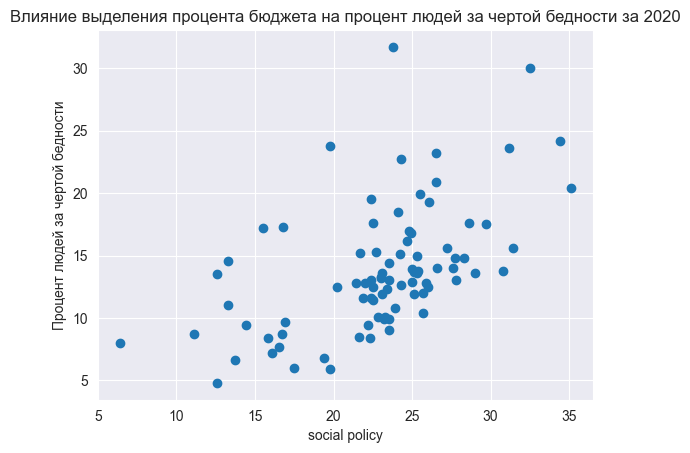

In [76]:
plt.scatter(region_database['social_policy_2020'], region_database['Процент людей за чертой бедности 2020'])
plt.xlabel('social policy')
plt.ylabel('Процент людей за чертой бедности')
plt.title('Влияние выделения процента бюджета на процент людей за чертой бедности за 2020')
plt.show()

Вывод: *Как мы видим на графике влияние социальной политики на процент людей за чертой бености маловероятен.С другой стороны только один год.Продолжим искать более сильные взаимосвязи*

In [77]:
region_database['Процент людей за чертой бедности 2010'].max()

35.7

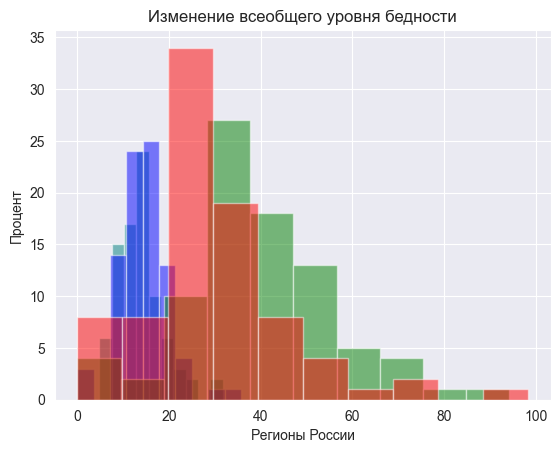

In [78]:
#Посмотрим где же все таки самый высокий процент людей за чертой бедности по годам
region_database['Процент людей за чертой бедности 2020'].hist(color = 'teal', grid=True, alpha = 0.5, label='2020')
region_database['Процент людей за чертой бедности 2010'].hist(color = 'blue', alpha = 0.5, label='2010')
region_database['Процент людей за чертой бедности 2000'].hist(color = 'green', alpha = 0.5, label='2000')
region_database['Процент людей за чертой бедности 1995'].hist(color = 'red', alpha = 0.5, label='1995')
plt.xlabel('Регионы России')
plt.ylabel('Процент')
plt.title('Изменение всеобщего уровня бедности')
plt.show()

Вывод: *По данной гистограмме мы можем с увереностью сказать что со времен развала СССР были решены проблемы с огромным уровнем бедности во всех регионах.Однако же в некоторых регионах с 7 по 20 следуя графику уровень бедности даже стал выше*

In [79]:
#Посмотрим что это за регионы
display(region_database[7:20])

region  social_policy_2015  social_policy_2016  \
7             Волгоградская область                18.0                26.7   
8               Вологодская область                20.3                21.4   
9               Воронежская область                15.2                15.4   
10     Еврейская автономная область                18.4                17.7   
11               Забайкальский край                17.1                17.2   
12               Ивановская область                18.1                28.9   
13                Иркутская область                15.9                15.3   
14  Кабардино-Балкарская Республика                13.8                14.8   
15          Калининградская область                10.0                 8.4   
16                Калужская область                14.5                20.0   
17                  Камчатский край                12.8                12.6   
18  Карачаево-Черкесская Республика                14.3                15.8   
19    Кемеровская область - Кузбасс                17.1                16.8   

    social_policy_2017  social_policy_2018  social_policy_2019  \
7                 24.7                24.2                24.0   
8                 28.9                26.6                24.1   
9                 22.8                20.9                19.0   
10                28.3                27.8                25.7   
11                29.3                25.6                22.1   
12                28.7                27.0                25.1   
13                24.6                24.2                29.3   
14                25.4                25.2                24.0   
15                 9.7                 9.3                 9.3   
16                18.6                17.7                16.6   
17                16.4                14.8                13.7   
18                24.6                23.1                20.8   
19                25.9                24.0                22.5   

    social_policy_2020   2000   2001   2002  ...  \
7                 25.1  10958  14420  18579  ...   
8                 25.9  10665  14204  17463  ...   
9                 21.6  11713  15777  18238  ...   
10                31.2   9198  13088  18310  ...   
11                26.5   8419  12206  16885  ...   
12                25.1   6687   8235  10452  ...   
13                28.6  15767  19241  22409  ...   
14                34.4   7249   9969  13508  ...   
15                12.6  13575  17508  20586  ...   
16                16.9   8723  12378  16855  ...   
17                13.3  19297  23315  26788  ...   
18                26.5   7659   9226  12594  ...   
19                23.0  12994  18709  24973  ...   

    В состоянии алкогольного опьянения 2021  \
7                                     39594   
8                                     20866   
9                                     26892   
10                                     3856   
11                                    37622   
12                                    13676   
13                                    53307   
14                                     4348   
15                                    12908   
16                                    14774   
17                                     6645   
18                                     5122   
19                                    62854   

    В состоянии наркотического опьянения 2021  \
7                                         584   
8                                         631   
9                                         903   
10                                         26   
11                                        477   
12                                         45   
13                                        833   
14                                        463   
15                                        143   
16                                        375   
17                                        204   
18                   

Подтвердим статистически что со временем уменьшился процент живущих за чертой бедности:
+ Нулевая гипотеза Ho: Процент остался таким же

+ Альтернативная гипотеза H1: Предполагается что процент уменьшился
> Cначала проверим на нормальность

In [80]:
# задаём уровень значимости
alpha = 0.05 



# проводим тест Шапиро — Уилка
_, p1 = stats.shapiro(region_database['Процент людей за чертой бедности 2020'])
_, p2 = stats.shapiro(region_database['Процент людей за чертой бедности 2000'])
print('p-value = %.3f' % (p1))
print('p-value = %.3f' % (p2))
# интерпретируем результат
if p1 <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')
    
if p2 <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')


p-value = 0.000
p-value = 0.037
Распределение не нормальное
Распределение не нормальное


In [81]:
# Так как распределение не нормальное и группы зависимы используем непараметрический критерий Уилкоксона
# проводим тест
_, p = stats.wilcoxon(region_database['Процент людей за чертой бедности 2020'], region_database['Процент людей за чертой бедности 2000'],
                      alternative = 'less')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p < alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: Статистически мы убедились что процент за чертой бедности уменьшился

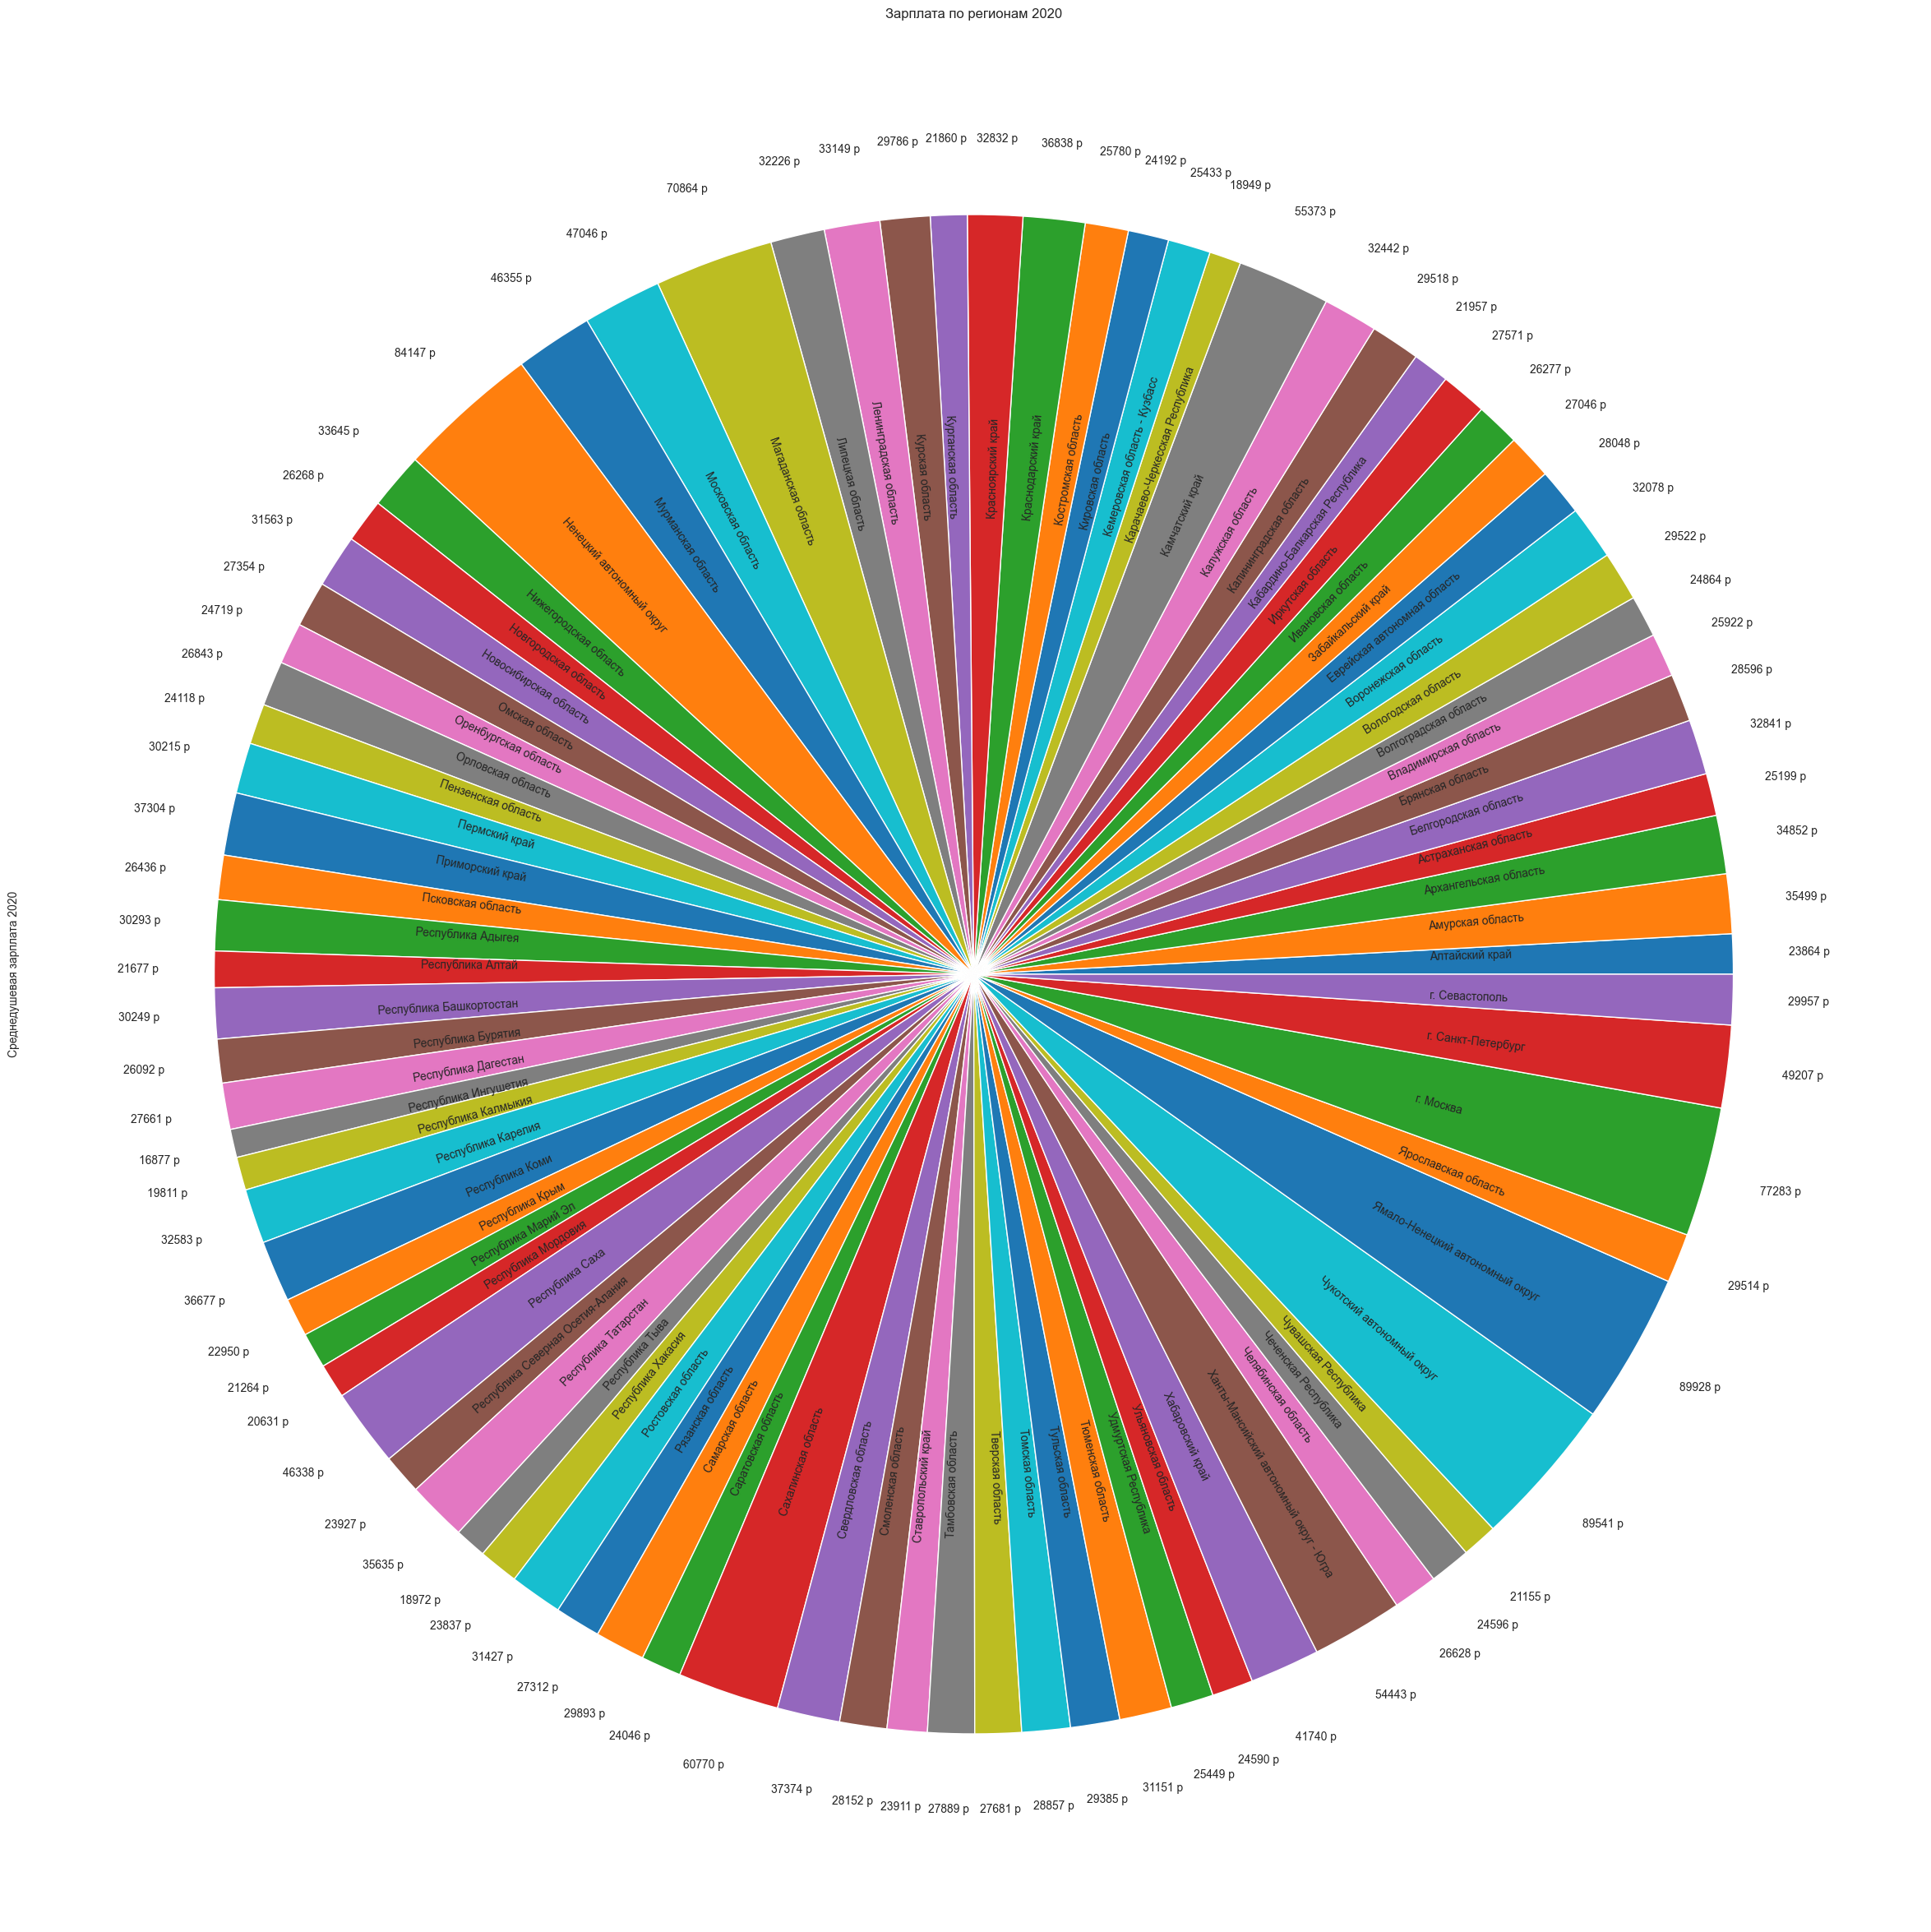

In [82]:
#Найдем в каких регионах среднедушевая зарплата самая низкая

pie1 = region_database['Среднедушевая зарплата 2020'].plot.pie(labels=region_database['region'], 
                                                               autopct=lambda x: '{:.0f} р'.format(x*region_database['Среднедушевая зарплата 2020'].sum()/100),
                                                               pctdistance=1.10, labeldistance=.6,
                                                               rotatelabels=True, figsize=(30, 30), title='Зарплата по регионам 2020')

plt.show()

Вывод: *На круговой диаграмме видно что и с зарплатой проблемы в тех же регионах*

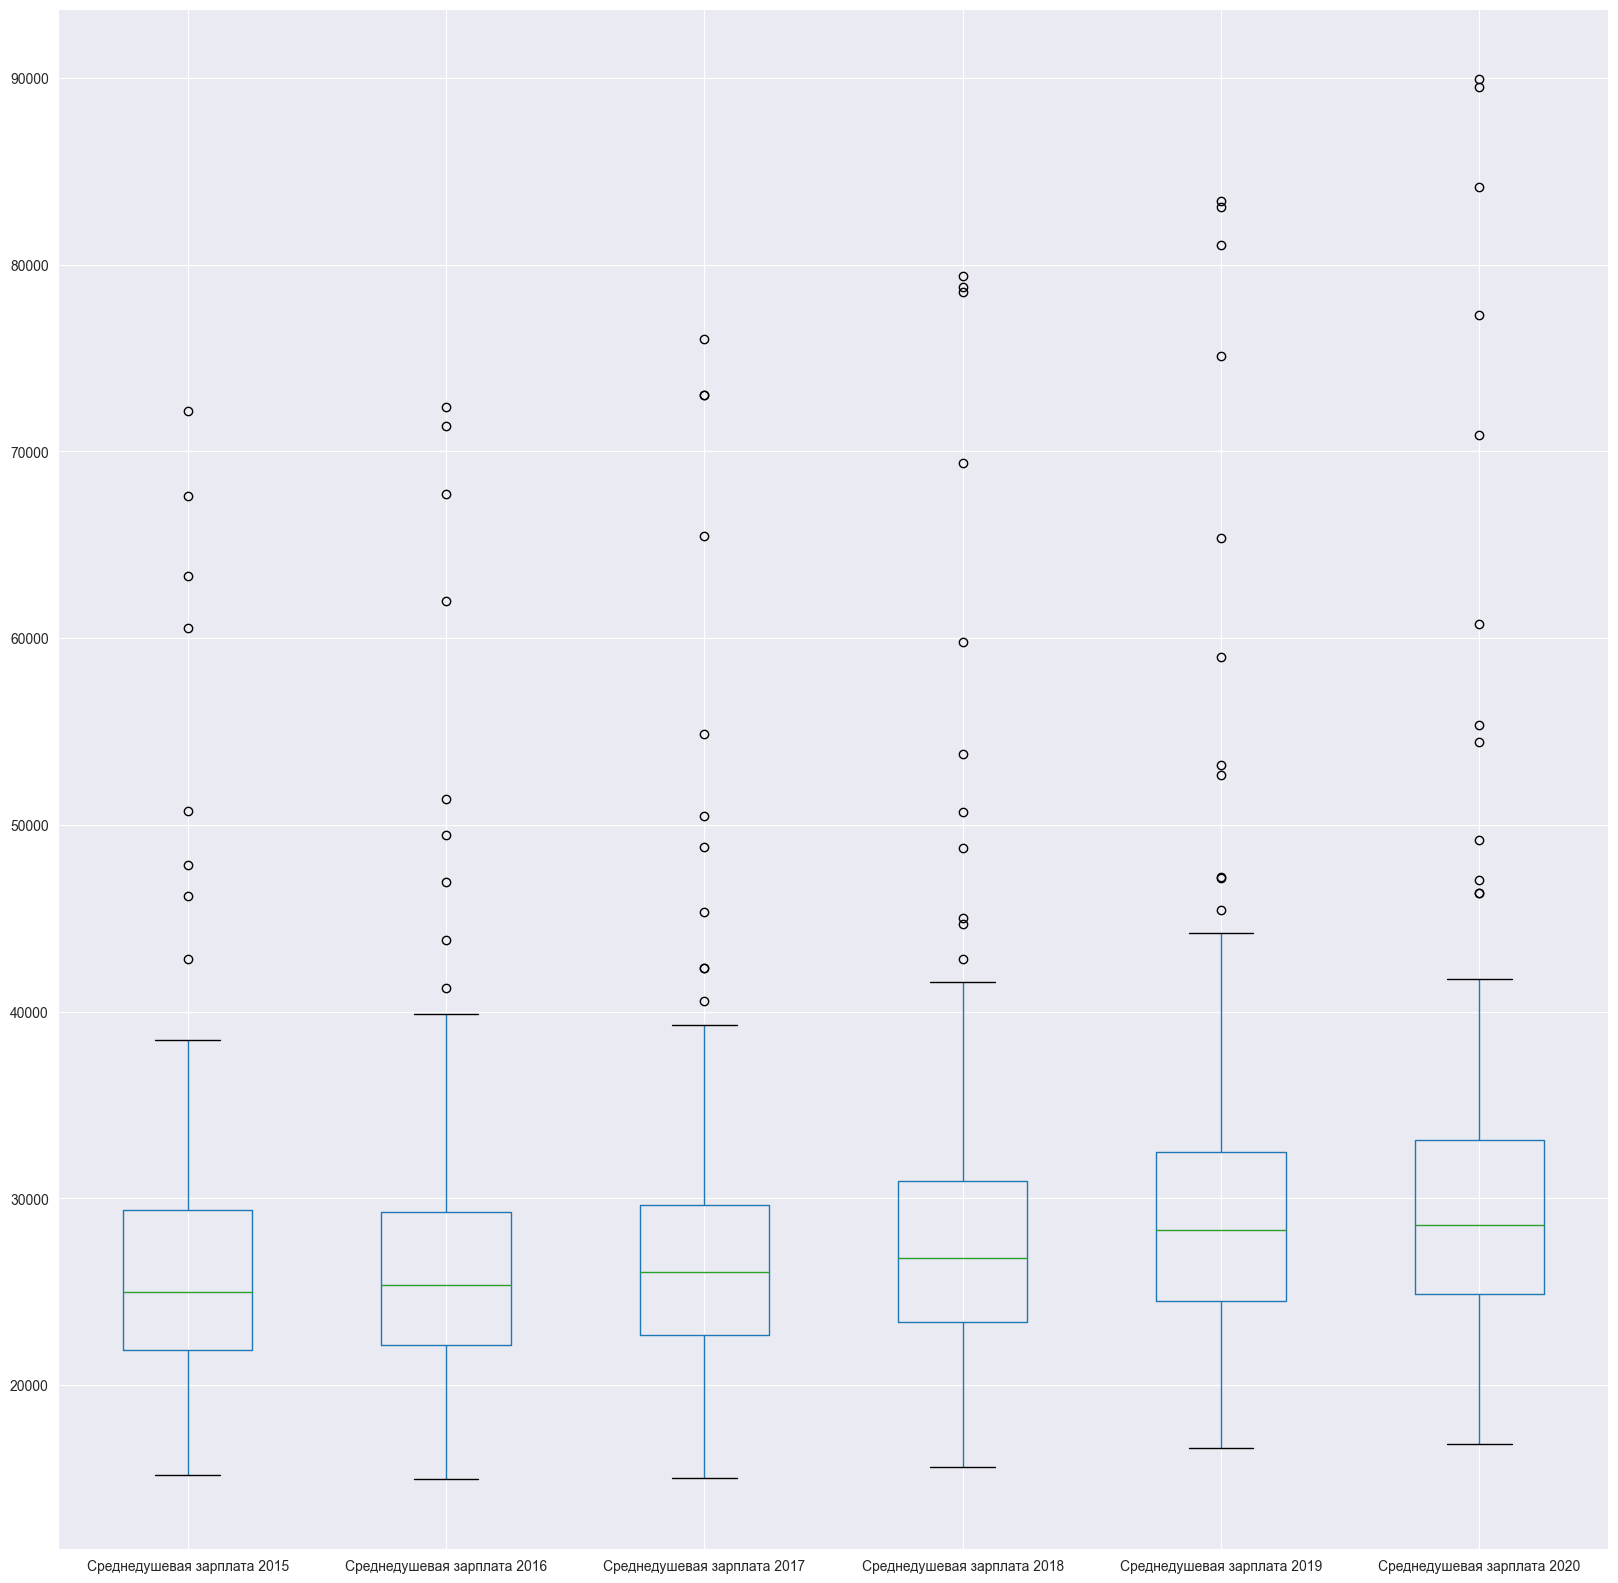

In [83]:
#Посмотрим вообще растет ли средняя на душу зарплата или наоборот есть спад 
region_database.boxplot(column=['Среднедушевая зарплата 2015', 'Среднедушевая зарплата 2016', 'Среднедушевая зарплата 2017',
                                'Среднедушевая зарплата 2018', 'Среднедушевая зарплата 2019', 'Среднедушевая зарплата 2020'], figsize=(20, 20))
plt.show()

Вывод: *По графику виден небольшой ежегодный рост дохода на душу населения.Видны небольшие выбросы*

Подтвердим статистически что со временем зарплата увеличилась:
+ Нулевая гипотеза Ho: Среднедушевая зарплата стала меньше или осталась такой же

+ Альтернативная гипотеза H1: Предполагается что среднедушевая зарплата увеличилась
> Cначала проверим на нормальность

In [84]:
# проводим тест Шапиро — Уилка
_, p1 = stats.shapiro(region_database['Среднедушевая зарплата 2015'])
_, p2 = stats.shapiro(region_database['Среднедушевая зарплата 2020'])
print('p-value = %.3f' % (p1))
print('p-value = %.3f' % (p2))
# интерпретируем результат
if p1 <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')
    
if p2 <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')


p-value = 0.000
p-value = 0.000
Распределение не нормальное
Распределение не нормальное


In [85]:
# Так как распределение не нормальное и группы зависимы используем непараметрический критерий Уилкоксона
# проводим тест
_, p = stats.wilcoxon(region_database['Среднедушевая зарплата 2020'], region_database['Среднедушевая зарплата 2015'],
                      alternative = 'greater')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p < alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


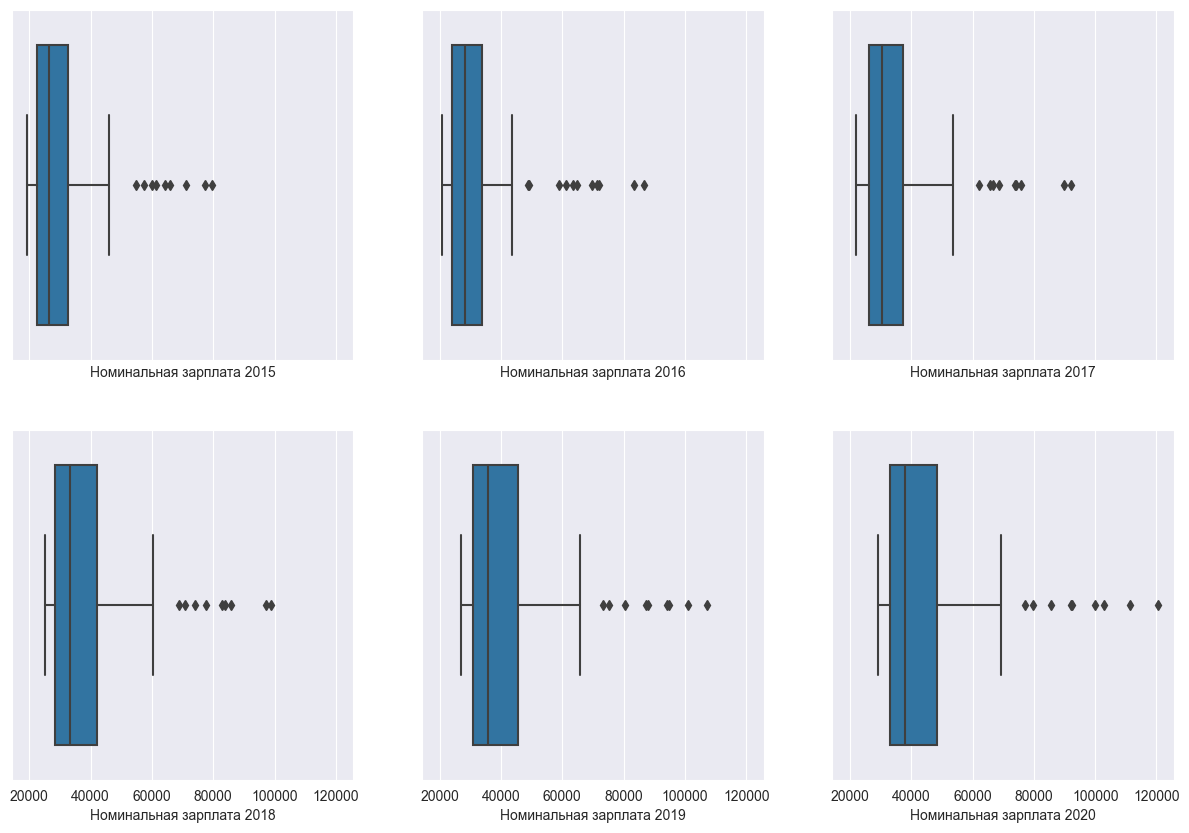

In [86]:
# Посмотрим растет ли номинальная зарплата
figure, axes = plt.subplots(2, 3, sharex=True, figsize=(15,10))
sns.boxplot(ax=axes[0, 0], data=region_database, x='Номинальная зарплата 2015')
sns.boxplot(ax=axes[0, 1], data=region_database, x='Номинальная зарплата 2016')
sns.boxplot(ax=axes[0, 2], data=region_database, x='Номинальная зарплата 2017')
sns.boxplot(ax=axes[1, 0], data=region_database, x='Номинальная зарплата 2018')
sns.boxplot(ax=axes[1, 1], data=region_database, x='Номинальная зарплата 2019')
sns.boxplot(ax=axes[1, 2], data=region_database, x='Номинальная зарплата 2020')
plt.show()

Вывод: 
>Видно что присутствует и рост номинальной заработной платы.Также замечены выбросы

Подтвердим статистически что со временем номинальная зарплата увеличилась:
+ Нулевая гипотеза Ho: Номинальная зарплата стала меньше или осталась такой же

+ Альтернативная гипотеза H1: Предполагается что номинальная зарплата увеличилась
> Cначала проверим на нормальность

In [87]:
_, p1 = stats.shapiro(region_database['Номинальная зарплата 2015'])
_, p2 = stats.shapiro(region_database['Номинальная зарплата 2020'])

print('p-value = %.3f' % (p1))
print('p-value = %.3f' % (p2))

# интерпретируем результат
if p1 <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')
    
if p2 <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')



p-value = 0.000
p-value = 0.000
Распределение не нормальное
Распределение не нормальное


In [88]:
# Так как распределение не нормальное и группы зависимы используем критерий Уилкоксона
# проводим тест
_, p = stats.wilcoxon(region_database['Номинальная зарплата 2020'], region_database['Номинальная зарплата 2015'],
                      alternative = 'greater')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p < alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: Есть статистическое подтверждение прироста уровня заработной платы

In [89]:
# Создадим данные просуммировав по регионам за 10 лет рожденных детей
ten_years_newborn = region_database.loc[:,'Рождено детей за 2011 год':'Рождено детей за 2021 год'].sum(axis = 1)
ten_years_newborn.index = region_database.region
ten_years_newborn = ten_years_newborn.reset_index()
ten_years_newborn = ten_years_newborn.rename(columns={0: 'Рождено за 10 лет'})
ten_years_newborn

region  Рождено за 10 лет
0                    Алтайский край             295350
1                  Амурская область             108153
2             Архангельская область             141957
3              Астраханская область             145829
4              Белгородская область             172839
..                              ...                ...
80  Ямало-Ненецкий автономный округ              88262
81              Ярославская область             148476
82                        г. Москва            1480728
83               г. Санкт-Петербург             692914
84                   г. Севастополь              51344

[85 rows x 2 columns]

In [90]:
#Посмотрим рождаемость по регионам за последние 10 лет

fig = px.treemap(
    data_frame=ten_years_newborn,
    path=['region'], 
    values='Рождено за 10 лет', 
    height=700, 
    width=1000, 
    title='Колличество рожденных детей за 10 лет по регионам' 
)

#отображаем его
fig.show()
fig.write_html("./Диаграммы/file.html")

Вывод: *Самый низкий уровень рождаемости в других регионах и скорее всего маловероятно связан с бедностью а больше связан колличеством народонаселения*

In [91]:
#Посмотрим на колличество населения по регионам

fig = px.treemap(
    data_frame=region_database,
    path=['region'], 
    values='январь 2022 г.', 
    height=700, 
    width=1000, 
    title='Kолличество населения по регионам' 
)

#отображаем его
fig.show()
fig.write_html("./Диаграммы/file1.html")

Вывод: *Есть конечно некоторые несовпадения но по большому счету предыдущий вывод подтвердился*

In [92]:
# Загружаем геоданные и обрабатываем для дальнейшей работы с ними
import geopandas as gpd
gdf = gpd.read_file('russia_regions.geojson')
gdf.region = gdf.region.str.replace(r" \(.*\)","")
dict_name = {'Кемеровская область': 'Кемеровская область - Кузбасс', 'Москва': 'г. Москва', 
             'Республика Северная Осетия — Алания': 'Республика Северная Осетия-Алания',
             'Санкт-Петербург': 'г. Санкт-Петербург', 'Севастополь': 'г. Севастополь',
             'Ханты-Мансийский автономный округ — Югра': 'Ханты-Мансийский автономный округ - Югра'}
gdf.region = gdf.region.replace(dict_name, regex=True)
gdf = gdf.sort_values('region').reset_index(drop=True)
gdf

C:\Users\Алексей\AppData\Local\Temp\ipykernel_14364\838480718.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



region federal_district  population  \
0                    Алтайский край        Сибирский     2130950   
1                  Амурская область  Дальневосточный      756198   
2             Архангельская область  Северо-Западный      964304   
3              Астраханская область            Южный      950557   
4              Белгородская область      Центральный     1514527   
..                              ...              ...         ...   
80  Ямало-Ненецкий автономный округ        Уральский      512387   
81              Ярославская область      Центральный     1194605   
82                        г. Москва      Центральный    13104177   
83               г. Санкт-Петербург  Северо-Западный     5600044   
84                   г. Севастополь         Крымский      558273   

                                             geometry  
0   MULTIPOLYGON (((77.88895 53.36719, 77.90537 53...  
1   MULTIPOLYGON (((119.65539 56.75703, 119.66075 ...  
2   MULTIPOLYGON (((37.28999 63.88848, 37.29170 63...  
3   MULTIPOLYGON (((47.52540 45.51626, 47.53680 45...  
4   MULTIPOLYGON (((35.32612 50.94681, 35.32656 50...  
..                                                ...  
80  MULTIPOLYGON (((71.63600 66.90468, 71.62035 66...  
81  MULTIPOLYGON (((37.32791 58.23664, 37.33503 58...  
82  MULTIPOLYGON (((37.28857 55.65487, 37.28958 55...  
83  MULTIPOLYGON (((30.06502 59.66822, 30.07340 59...  
84  MULTIPOLYGON (((33.83026 44.55701, 33.83024 44...  

[85 rows x 4 columns]

In [93]:
# Добавляем признаки в геоданные на основе нашего датасета
gdf['disabled'] = region_database['Общее колл-во инвалидов 2018'].astype(int)
gdf['Percentage_of_people_below_the_poverty_line'] = region_database['Процент людей за чертой бедности 2018']
gdf['drug'] = round(region_database['Наркоманы 2018']).astype(int)
gdf['alco'] = round(region_database['Алкоголики 2018']).astype(int)
gdf['population_2018'] = region_database['январь 2018 г.']
gdf['Зарплата'] = region_database['Среднедушевая зарплата 2018']
gdf['Отгруженные_товары'] = region_database['отгруженные товары 2018']
gdf

region federal_district  population  \
0                    Алтайский край        Сибирский     2130950   
1                  Амурская область  Дальневосточный      756198   
2             Архангельская область  Северо-Западный      964304   
3              Астраханская область            Южный      950557   
4              Белгородская область      Центральный     1514527   
..                              ...              ...         ...   
80  Ямало-Ненецкий автономный округ        Уральский      512387   
81              Ярославская область      Центральный     1194605   
82                        г. Москва      Центральный    13104177   
83               г. Санкт-Петербург  Северо-Западный     5600044   
84                   г. Севастополь         Крымский      558273   

                                             geometry  disabled  \
0   MULTIPOLYGON (((77.88895 53.36719, 77.90537 53...    178491   
1   MULTIPOLYGON (((119.65539 56.75703, 119.66075 ...     67042   
2   MULTIPOLYGON (((37.28999 63.88848, 37.29170 63...     87258   
3   MULTIPOLYGON (((47.52540 45.51626, 47.53680 45...     44127   
4   MULTIPOLYGON (((35.32612 50.94681, 35.32656 50...    214048   
..                                                ...       ...   
80  MULTIPOLYGON (((71.63600 66.90468, 71.62035 66...     13546   
81  MULTIPOLYGON (((37.32791 58.23664, 37.33503 58...    108019   
82  MULTIPOLYGON (((37.28857 55.65487, 37.28958 55...   1045866   
83  MULTIPOLYGON (((30.06502 59.66822, 30.07340 59...    603185   
84  MULTIPOLYGON (((33.83026 44.55701, 33.83024 44...     19973   

    Percentage_of_people_below_the_poverty_line  drug  alco  population_2018  \
0                                          17.4   409  2070          2350080   
1                                          15.6   195   906           798424   
2                                          13.5   107   751          1155028   
3                                          15.1     2   226          1017514   
4                                           7.5    50   640          1549876   
..                                          ...   ...   ...              ...   
80                                          5.8   102   511           538547   
81                                         10.2    97   575          1265684   
82                                          6.6  1088  2890         12506468   
83                                          6.5   503   786          5351935   
84                                         10.8   112   396           436670   

    Зарплата  Отгруженные_товары  
0    22829.0        7.711927e+11  
1    30937.0        2.687608e+11  
2    32054.0        1.347627e+12  
3    23670.0        8.837665e+11  
4    30778.0        1.790868e+12  
..       ...                 ...  
80   79398.0        5.940773e+12  
81   27055.0        8.930817e+11  
82   69393.0        1.831977e+13  
83   44999.0        5.825741e+12  
84   28834.0        6.586928e+10  

[85 rows x 11 columns]

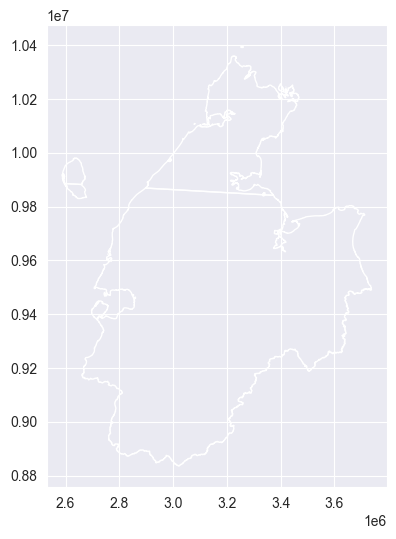

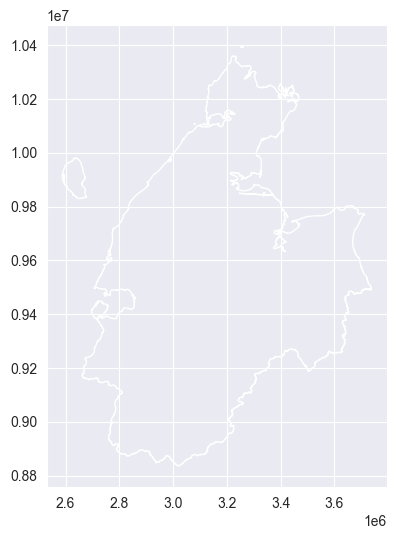

In [94]:
# Трансформируем геометрию в новую координатную систему
gdf = gdf.to_crs('EPSG:32646')
CHUK = 'Чукотский автономный округ'

gdf.loc[gdf.region == CHUK].plot(figsize=(6,6), facecolor="none")
plt.show()

# Объединение разбитых полигонов Чукотки
new_chuk = []
chuk_geoms = gdf.loc[gdf.region == CHUK, 'geometry'].values[0].geoms

# приклеим друг к другу полигоны находящиеся на расстоянии менее 100 единиц
for i, g in enumerate(chuk_geoms):
    new_g = g
    for j in range(len(chuk_geoms)):
        new_g = snap(new_g, chuk_geoms[j], 100)
    new_chuk.append(new_g)
new_chuk = unary_union(MultiPolygon(new_chuk))
gdf.loc[gdf.region == CHUK, 'geometry'] = new_chuk

gdf.loc[gdf.region == CHUK].plot(figsize=(6,6), facecolor="none")
plt.show();

In [95]:
def prepare_regions(gdf, area_thr=100e6, simplify_tol=500):
    """Подготовка регионов к построению
    
    - Упрощение геометрии с допуском simplify_tol
    - Удаление полигонов с площадью менее area_thr
    """
    gdf_ = gdf.copy()
    
    # Вспомогательный столбец для упорядочивания регионов по площади
    gdf_['area'] = gdf_.geometry.apply(lambda x: x.area)

    # Удаляем маленькие полигоны
    tqdm.pandas(desc='Удаление мелких полигонов')
    gdf_.geometry = gdf_.geometry.progress_apply(lambda geometry: 
        MultiPolygon([p for p in geometry.geoms if p.area > area_thr]) 
            if type(geometry) == MultiPolygon else geometry
    )
    
    # Упрощение геометрии
    gdf_.geometry = gdf_.geometry.simplify(simplify_tol)
    
    geoms = gdf_.geometry.values
    pbar = tqdm(enumerate(geoms), total=len(geoms))
    pbar.set_description_str('Объединение границ после упрощения')
    # проходим по всем граничащим полигонам и объединяем границы
    for i, g in pbar:
        g1 = g
        for g2 in geoms:
            if g1.distance(g2) < 100:
                g1 = snap(g1, g2, 800)
        geoms[i] = g1
    gdf_.geometry = geoms
    
    # сортировка по площади
    gdf_ = gdf_.sort_values(by='area', ascending=False).reset_index(drop=True) 
    
    return gdf_.drop(columns=['area'])

In [96]:
def geom2shape(g):
    """Преобразование полигонов и мультиполигонов в plotly-readable шэйпы    
    
    Получает на вход Polygon или MultiPolygon из geopandas, 
    возвращает pd.Series с координатами x и y
    """
    # Если мультиполигон, то преобразуем каждый полигон отдельно, разделяя их None'ами
    if type(g) == MultiPolygon:
        x, y = np.array([[], []])
        for poly in g.geoms:
            x_, y_ = poly.exterior.coords.xy
            x, y = (np.append(x, x_), np.append(y, y_))
            x, y = (np.append(x, None), np.append(y, None))
        x, y = x[:-1], y[:-1]
    # Если полигон, то просто извлекаем координаты
    elif type(g) == Polygon:      
        x, y = np.array(g.exterior.coords.xy)
    # Если что-то другое, то возвращаем пустые массивы
    else:
        x, y = np.array([[], []])
    return pd.Series([x,y])

In [97]:
# Упрощение геометрии   
regions = prepare_regions(gdf)
# Преобразование полигонов в шейпы   
regions[['x','y']] = regions.geometry.progress_apply(geom2shape)
# Запись на диск   
regions.to_parquet('russia_regions.parquet')


Удаление мелких полигонов: 100%|██████████| 85/85 [00:00<00:00, 1103.92it/s]


In [98]:
REGIONS = pd.read_parquet("russia_regions.parquet")

def convert_crs(x_arr, y_arr, to_crs='EPSG:32646', from_crs="EPSG:4326"):
    """Преобразование значений координат в массивах x_arr и y_arr
    из географической системы отсчёта from_crs в систему to_crs
    """
    data = [Point(x,y) for x,y in zip(x_arr, y_arr)]
    pts = gpd.GeoSeries(data, from_crs).to_crs(to_crs)
    
    return pts.x, pts.y

class mapFigure(go.Figure):
    """ Шаблон фигуры для рисования поверх карты России
    """
    def __init__(self, # дефолтные параметры plotly
        data=None, layout=None, frames=None, skip_invalid=False, 
        **kwargs # аргументы (см. документацию к plotly.graph_objects.Figure())
    ):
        # создаём plotlу фигуру с дефолтными параметрами
        super().__init__(data, layout, frames, skip_invalid, **kwargs)

        # прорисовка регионов
        for i, r in REGIONS.iterrows():
            self.add_trace(go.Scatter(x=r.x, y=r.y,
                                      name=r.region,
                                      text=r.region,
                                      hoverinfo="text",
                                      line_color='grey',
                                      fill='toself',
                                      line_width=1,
                                      fillcolor='lightblue',
                                      showlegend=False
            ))
        
        # не отображать оси, уравнять масштаб по осям
        self.update_xaxes(visible=False)
        self.update_yaxes(visible=False, scaleanchor="x", scaleratio=1)

        # чтобы покрасивее вписывалась карта на поверхности фигуры
        self.update_layout(showlegend=False, dragmode='pan',
                           width=800, height=450, 
                           margin={'l': 10, 'b': 10, 't': 10, 'r': 10})

In [99]:
# отображаем на шаблоне зависимости признаков
russia_map = mapFigure()

fo_list = list(regions['federal_district'].unique())
colors = px.colors.qualitative.Pastel1

for i, r in regions.iterrows():
    population_text = f"Колл-во населения: <b>{r.population_2018:_} </b> чел.".replace('_', ' ')
    disabled_text = f"Колл-во инвалидов: <b>{r.disabled:_} </b> чел.".replace('_', ' ')
    pp_text = f"Процент людей за чертой бедности: <b>{r.Percentage_of_people_below_the_poverty_line:_} </b> процентов.".replace('_', ' ')
    alco_text = f"Количество алкоголиков по региону: <b>{r.alco:_} </b> чел.".replace('_', ' ')
    drug_text = f"Количество наркоманов по региону: <b>{r.drug:_} </b> чел.".replace('_', ' ')
    cash_text = f"Заработная плата на одного человека по региону: <b>{r.Зарплата:_} </b> руб.".replace('_', ' ')
    shipped_goods_text = f"Сумма отгруженных товаров: <b>{r.Отгруженные_товары:_} </b> руб.".replace('_', ' ')
    text = f'<b>{r.region}</b><br>{r.federal_district} ФО<br>{disabled_text}<br>{pp_text}<br>{alco_text}<br>{drug_text}' \
    f'<br>{population_text}<br>{cash_text}<br>{shipped_goods_text}'
    russia_map.update_traces(selector=dict(name=r.region),
        text=text,
        fillcolor=colors[fo_list.index(r.federal_district)])
russia_map.show()
fig.write_html("./Диаграммы/file2.html")

Вывод: **По данной карте мы можем наблюдать что в малонаселенных регионах но имеющих важность для страны таких как часть дальнего востока или северная часть богата залежами ресурсов и близостью гос границы чтобы люди не уезжали выплачивается огромная зарплата ну и доставку чего либо в такие регионы очень трудно реализовать,соответственно идет высокая наценка на товар.Ну и в столичных регионах тоже высокая зарплата.Но в таких регионах огромный
уровень бедности так как скорее всего слабо развиты производственные мощи, а значит в рабочей деятельности занято далеко не все население и кроме того на таких предприятиях больше дают предпочтение опытным вахтовикам.Отсюда большое колличество алкоголиков, и также их много в густонаселенных районах.Наркомания же растет также в густонаселенных районах либо рядом с границей откуда собственно наркотики и проникают.Так что большее влияние на рост
процента людей за чертой бедности из всех показанных признаков влияет производство а значитколличество отгруженных товаров в рублях и колличество населения.Доля инвалидов тоже не особо влияет на процент бедности а скорее всего на инвалидов влияет насколько развит регион и как густо он заселен.**


In [100]:
# Посмотрим на процентные данные людей за чертой бедности

fig = go.Figure()

fig.add_trace(go.Histogram(y=region_database['Процент людей за чертой бедности 2019'], x=region_database['Дети до 16 лет 2019'], name="процент Детей"))
fig.add_trace(go.Histogram(y=region_database['Процент людей за чертой бедности 2019'], x=region_database['Пенсионеры 2019'], name='процент Пенсионеров'))
fig.add_trace(go.Histogram(y=region_database['Процент людей за чертой бедности 2019'], x=region_database['Трудоспособное население 2019'], name='процент трудоспособного населения'))
fig.show()
fig.write_html("./Диаграммы/file3.html")

In [101]:
# Посмотрим на процентные данные людей за чертой бедности

fig = go.Figure()

fig.add_trace(go.Histogram(y=region_database['Процент людей за чертой бедности 2020'], x=region_database['Дети до 16 лет 2020'], name="процент Детей"))
fig.add_trace(go.Histogram(y=region_database['Процент людей за чертой бедности 2020'], x=region_database['Пенсионеры 2020'], name='процент Пенсионеров'))
fig.add_trace(go.Histogram(y=region_database['Процент людей за чертой бедности 2020'], x=region_database['Трудоспособное население 2020'], name='процент трудоспособного населения'))
fig.show()
fig.write_html("./Диаграммы/file4.html")

Вывод: **Данный график показывает что процент процента людей за чертой бедности самый высокий у трудоспособного населения что говорит скорее об нехватке работы и маленьких зарплат показаных на предыдущих графиках на которых вместо повышения зарплат и повышения квалификации местных жителей нанимают нелегальных мигрантов и специалистов с других регионов**

In [102]:
# Посмотрим есть ли зависимость между валовым продуктом и покупательской способностью на душу населения
fig = px.scatter(region_database, x="Валовый продукт на душу 2020", y="2020", color="region")
fig.show()
fig.write_html("./Диаграммы/file5.html")

Вывод:  
> Ну тут вроде бы логично что от произодства и продажи валового продукта на душу и оборот розничной торговли на человека вырастает и скорее всего средняя на душу зарплата.Ну и впринципе внизу мелькают те же регионы в которых высокий процент людей за чертой бедности так что мы можем примерно понять что эти признаки влиют на процент людей за чертой бедности

In [103]:
# Посмотрим есть ли зависимость заболеваний и людей за чертой бедности
fig = px.scatter(region_database, x="Все заболевания 2016", y="Процент людей за чертой бедности 2016", size="Все заболевания 2016", color="region")
fig.show()
fig.write_html("./Диаграммы/file6.html")

Вывод: 
> Количество заболеваний больше зависит от колличества самого населения чем от процента бедного населения судя по регионам так что этот признак не должен оказывать сильного влияния

In [104]:
# Поглядим есть ли зависимость  у признака Процент людей за чертой бедности от вида домохозяйства
fig = go.Figure()

fig.add_trace(go.Histogram(y=region_database['Процент людей за чертой бедности 2020'],
                           x=region_database['в том числе домохозяйства, указавшие, что при проживании не испытывают стесненности'],
                           name="Домохезяйства не испытывающие стесненности"))
fig.add_trace(go.Histogram(y=region_database['Процент людей за чертой бедности 2020'],
                           x=region_database['в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность'],
                           name='Домохозяйства испытывающие некую стесненность'))
fig.add_trace(go.Histogram(y=region_database['Процент людей за чертой бедности 2020'],
                           x=region_database['в том числе домохозяйства, указавшие, что при проживании испытывают большую стесненность'],
                           name='Домохозяйства испытывающие большую стесненность'))

fig.show()
fig.write_html("./Диаграммы/file7.html")

Вывод: 
> По увиденым данным можно судить что имеет влияние самый большой процент минимального процента домохозяйств испытывающих большую стесненность 

In [105]:
fig = px.scatter_matrix(region_database, dimensions=["Несовершеннолетними или при их соучастии 2021",
                                                     "Ранее совершавшими преступления 2021", "Процент людей за чертой бедности 2020",
                                                     'Иностранными гражданами и лицами без гражданства 2021',
                                                     'Членом семьи, супругом, сожителем, сексуальным партнером (в том числе бывшими) 2021',
                                                     'В состоянии алкогольного опьянения 2021', 'Смертность детей 2021'],
                        color="region",
                        labels={"Несовершеннолетними или при их соучастии 2021": 'Несовершеннолетние',
                                "Ранее совершавшими преступления 2021": 'Рецидивистами', "Процент людей за чертой бедности 2020": 'Люди за чертой бедности',
                                'Иностранными гражданами и лицами без гражданства 2021': 'Не гражданами',
                                'Членом семьи, супругом, сожителем, сексуальным партнером (в том числе бывшими) 2021': 'Членом семьи',
                                'В состоянии алкогольного опьянения 2021': 'алкогольное опьянение', 'Смертность детей 2021': 'Смертность детей'})
fig.update_layout(
    title='Взаимосвязь преступлений смертности детей и процент людей за чертой бедности',
    width=1500,
    height=1200,
)
fig.update_traces(diagonal_visible=False)
fig.show()
fig.write_html("./Диаграммы/file8.html")

Вывод:
> По большей части мы видим что признаки имеют линейную связь, что скорее всего значит что чем больше в регионе ранее судимых и рецидивистов тем больше появляется и новых преступников которых те завлекают.Так же видна связь с преступлениями в семье в этих регионах и преступлениями совершенными под воздействием алкоголя.Можно с уверенностью сказать что в этих регионах культивируется преступность как нормальность и все ведет к повторению тех же ошибок.Не гражданами России в основном совершаются преступления в более богатых регионах.Смертность детей тоже слабо связано с другими признаками скорее всего большая связь с теми регионами где больше всего рождаемость.Как мы видим с людьми за чертой бедности эти признаки не имеют сильной связи.

In [106]:
#Просмотрим у признаков нормальное ли распределение
shapiro_data = region_database.drop('region', axis=1)
list_of_name = []
alpha = 0.05

def not_normal_distribution(data, alpha, list_of_name):
    for name, label in data.items():
        _, p_value = stats.shapiro(label)
        if p_value > alpha:
            list_of_name.append(name)
    return list_of_name
    
# Получим список признаков с нормальным распределением    
not_normal_distribution(shapiro_data, alpha, list_of_name)    

['social_policy_2015',
 'Дети до 16 лет 2017',
 'Пенсионеры 2017',
 'Дети до 16 лет 2018',
 'Трудоспособное население 2018',
 'Дети до 16 лет 2019',
 'Пенсионеры 2019',
 'Трудоспособное население 2019',
 'Дети до 16 лет 2020',
 'Трудоспособное население 2020',
 'в том числе домохозяйства, указавшие, что при проживании не испытывают стесненности',
 'в том числе домохозяйства, указавшие, что при проживании испытывают определенную стесненность']

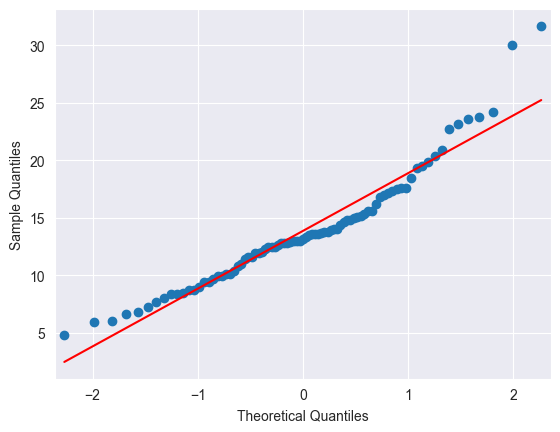

In [107]:
#Проверим признак из списка правда ли нет нормального распределения
qqplot(region_database['Процент людей за чертой бедности 2020'], line='s')
plt.show()

In [108]:
X = region_database.drop('region', axis=1)
col_names = list(X.columns)

In [109]:
# Так как на многих графиках было замечено некоторое колличество выбросов в данных нормализуем данные с помощью RobustScaler

r_s = RobustScaler()
X_norm = r_s.fit_transform(X)

X_df = pd.DataFrame(X_norm, columns=col_names)

In [110]:
#Посмотрим корреляцию
X_df.corr()

social_policy_2015  \
social_policy_2015                                            1.000000   
social_policy_2016                                            0.699398   
social_policy_2017                                            0.769141   
social_policy_2018                                            0.796223   
social_policy_2019                                            0.744235   
...                                                                ...   
Из них в отношении несовершеннолетних 2021                    0.197220   
Иностранными гражданами и лицами без гражданств...            0.027657   
Из них гражданами государств – участников СНГ 2021            0.032108   
Из них трудовых мигрантов 2021                                0.056898   
Из них незаконных мигрантов 2021                              0.195694   

                                                    social_policy_2016  \
social_policy_2015                                            0.699398   
social_policy_2016                                            1.000000   
social_policy_2017                                            0.637381   
social_policy_2018                                            0.662983   
social_policy_2019                                            0.622698   
...                                                                ...   
Из них в отношении несовершеннолетних 2021                    0.130601   
Иностранными гражданами и лицами без гражданств...            0.004193   
Из них гражданами государств – участников СНГ 2021            0.016469   
Из них трудовых мигрантов 2021                               -0.010538   
Из них незаконных мигрантов 2021                              0.158041   

                                                    social_policy_2017  \
social_policy_2015                                            0.769141   
social_policy_2016                                            0.637381   
social_policy_2017                                            1.000000   
social_policy_2018                                            0.971126   
social_policy_2019                                            0.912107   
...                                                                ...   
Из них в отношении несовершеннолетних 2021                    0.201351   
Иностранными гражданами и лицами без гражданств...           -0.272939   
Из них гражданами государств – участников СНГ 2021           -0.256443   
Из них трудовых мигрантов 2021                               -0.176086   
Из них незаконных мигрантов 2021                              0.052230   

                                                    social_policy_2018  \
social_policy_2015                                            0.796223   
social_policy_2016                                            0.662983   
social_policy_2017                                            0.971126   
social_policy_2018                                            1.000000   
social_policy_2019                                            0.949555   
...                                                                ...   
Из них в отношении несовершеннолетних 2021                    0.218997   
Иностранными гражданами и лицами без гражданств...           -0.197981   
Из них гражданами государств – участников СНГ 2021           -0.182680   
Из них трудовых мигрантов 2021                               -0.132446   
Из них незаконных мигрантов 2021                              0.071229   

                                                    social_policy_2019  \
social_policy_2015                                            0.744235   
social_policy_2016                                            0.622698   
social_policy_2017                                            0.912107   
social_policy_2018                                            0.949555   
social_policy_2019                                            1.000000   
...                                                 

In [111]:
# Так как во многих признаках видна высокая корреляция и их много а я не хочу терять важные данные то применю к фрейму метод главных компонент

#определяем метод главных компонент и находим колличество компонент 
pca = PCA()
#обучаем алгоритм на наших данных


pca.fit(X_norm)
cumsum = np.cumsum(pca.explained_variance_ratio_)
comp_ = np.argmax(cumsum >= 0.95) + 1
comp_

10

In [112]:
pca = PCA(10)
#обучаем алгоритм на наших данных
X_pca = pca.fit_transform(X_norm)

## <h1><center>2.Моделирование</center></h1>
![alt text](Диаграммы/20945347-Converted-01-edited.png)

In [113]:
# Попробуем самую первую стандартную модель
k_means = cluster.KMeans(random_state=42)
new_cluster = k_means.fit(X_pca)
new_predict = new_cluster.predict(X_pca)
print(new_cluster.labels_)

[2 6 6 6 6 6 6 6 6 6 0 6 6 2 0 6 6 4 0 2 6 0 2 2 6 6 6 6 4 5 4 3 2 0 2 6 6
 0 6 2 6 0 0 0 2 0 2 0 0 6 4 0 0 0 4 0 2 0 0 2 6 2 6 4 2 6 6 6 6 6 6 7 6 6
 6 4 2 0 6 4 3 6 1 5 0]


C:\Users\Алексей\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [114]:
new_series = pd.Series(new_cluster.labels_, index=region_database['region'])
display(new_series[new_series == 0])

region
Еврейская автономная область         0
Кабардино-Балкарская Республика      0
Карачаево-Черкесская Республика      0
Костромская область                  0
Новгородская область                 0
Орловская область                    0
Псковская область                    0
Республика Адыгея                    0
Республика Алтай                     0
Республика Бурятия                   0
Республика Ингушетия                 0
Республика Калмыкия                  0
Республика Крым                      0
Республика Марий Эл                  0
Республика Мордовия                  0
Республика Северная Осетия-Алания    0
Республика Тыва                      0
Республика Хакасия                   0
Чеченская Республика                 0
г. Севастополь                       0
dtype: int32

In [115]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(X_pca, labels=new_predict):.3f}")    
print(f"Calinski harabasz Coefficient: {metrics.calinski_harabasz_score(X_pca, labels=new_predict):.3f}") 
print(f"Davies bouldin Coefficient: {metrics. davies_bouldin_score(X_pca, labels=new_predict):.3f}")

Silhouette Coefficient: 0.288
Calinski harabasz Coefficient: 152.879
Davies bouldin Coefficient: 0.718


Вывод: Самая первая модель показывает неплохое разделение на кластеры с учетом того что г. Севастополь содержит мало данных как и Республика Крым

<AxesSubplot: xlabel='cluster', ylabel='inertia'>

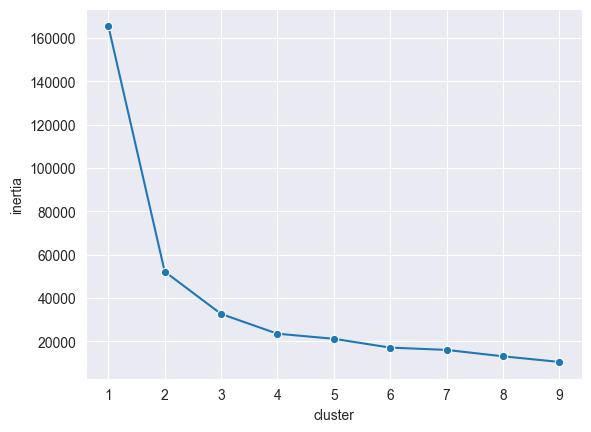

In [116]:
#Напишем функцию подсчета метода локтя
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  cluster.KMeans(n_clusters=cluster_num, init='k-means++', n_init='auto', random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создадим пустой словарь, ключами будут инерция и количество кластеров
res = {"inertia": [], "cluster": []}
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраним значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    res["inertia"].append(get_inertia(cluster_num, X_pca))
    res["cluster"].append(cluster_num)

# сохраним в датафрейм значение инерции и количество кластеров
res_df = pd.DataFrame(res)
import seaborn as sns
# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=res_df, x="cluster", y="inertia", marker= "o")

<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

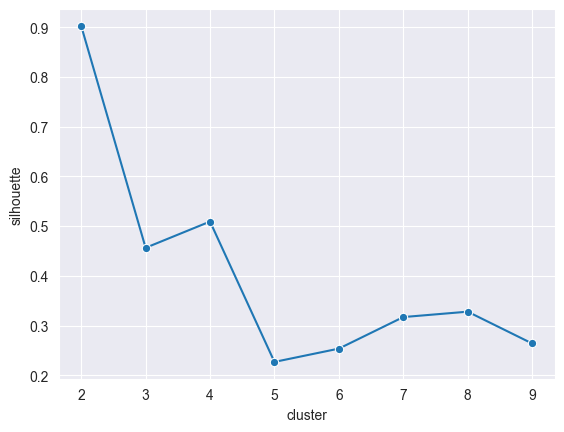

In [117]:
# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  cluster.KMeans(n_clusters=cluster_num, init='k-means++', n_init='auto', random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = metrics.silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}



for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X_pca))
    silhouette_res["cluster"].append(cluster_num)
     
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

In [118]:
# Подставляем подобранное колличество кластеров из коэффициента силуэта
k_means = cluster.KMeans(n_clusters=4, init='k-means++',random_state=42)
new_cluster = k_means.fit(X_pca)
new_predict = new_cluster.predict(X_pca)
print(new_cluster.labels_)

[3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 0 3 3 0 0 0 0 0 3 0 2 3 0 3 0 0
 0 0 3 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 3 0 0 3 0 3 0 2 3 0 0 0 0 0 0 3 0 0
 0 2 3 0 0 2 2 0 1 3 0]


C:\Users\Алексей\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [119]:
new_series = pd.Series(new_cluster.labels_, index=region_database['region'])
display(new_series[new_series == 2])

region
Ненецкий автономный округ                   2
Сахалинская область                         2
Ханты-Мансийский автономный округ - Югра    2
Чукотский автономный округ                  2
Ямало-Ненецкий автономный округ             2
dtype: int32

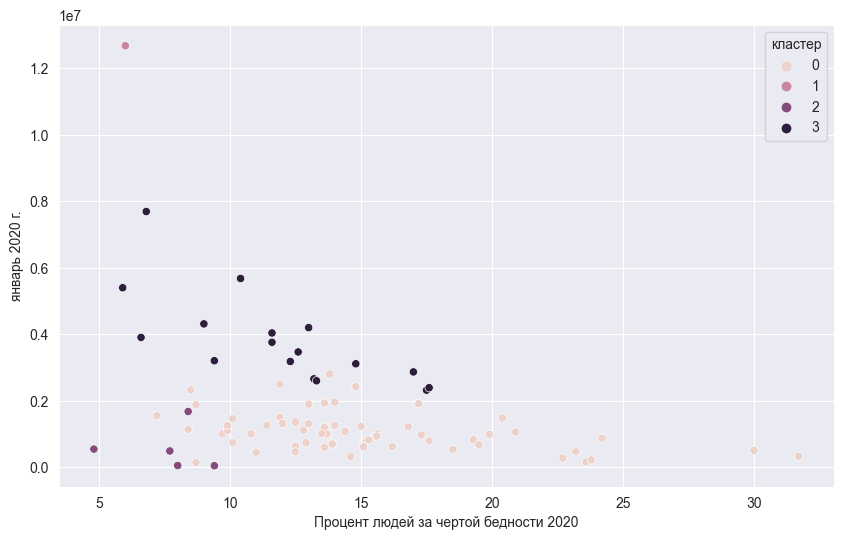

In [120]:
#Посмотрим работает ли алгоритм
region_database['кластер'] = new_cluster.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=region_database, x='Процент людей за чертой бедности 2020', y='январь 2020 г.', hue='кластер')
plt.show()

Вывод: **В принципе рабочий алгоритм показывает кластеры похоже, но надо его оценить**

In [121]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(X_pca, labels=new_predict):.3f}")    
print(f"Calinski harabasz Coefficient: {metrics.calinski_harabasz_score(X_pca, labels=new_predict):.3f}") 
print(f"Davies bouldin Coefficient: {metrics. davies_bouldin_score(X_pca, labels=new_predict):.3f}")

Silhouette Coefficient: 0.509
Calinski harabasz Coefficient: 163.359
Davies bouldin Coefficient: 0.644


<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

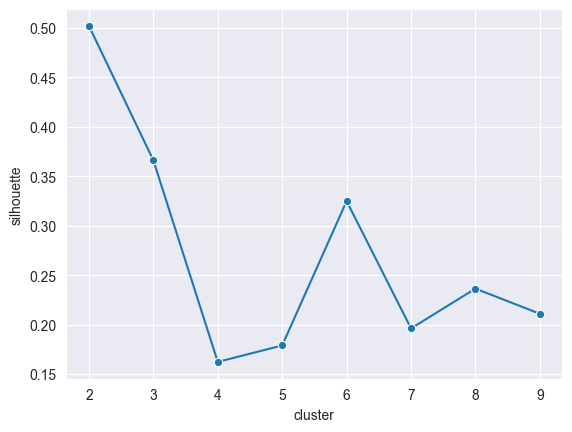

In [122]:
# напишем функцию по коэффициенту силуэта для нового алгоритма
def get_silhouette(cluster_num, X):
    kmb_means =  cluster.MiniBatchKMeans(n_clusters=cluster_num, n_init='auto', random_state=42)
    kmb_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = metrics.silhouette_score(X, kmb_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут силуэт и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}



for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X_pca))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

In [123]:
# Попробум другой вариант модели для большого колличества данных
kmb_means = cluster.MiniBatchKMeans(n_clusters=3, n_init='auto', random_state=42)
new_cluster = kmb_means.fit(X_pca)
new_predict = new_cluster.predict(X_pca)


In [124]:
new_series = pd.Series(new_cluster.labels_, index=region_database['region'])
display(new_series[new_series == 2])

region
Камчатский край                             2
Магаданская область                         2
Мурманская область                          2
Ненецкий автономный округ                   2
Республика Коми                             2
Республика Саха                             2
Сахалинская область                         2
Ханты-Мансийский автономный округ - Югра    2
Чукотский автономный округ                  2
Ямало-Ненецкий автономный округ             2
dtype: int32

In [125]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(X_pca, labels=new_predict):.3f}")    
print(f"Calinski harabasz Coefficient: {metrics.calinski_harabasz_score(X_pca, labels=new_predict):.3f}") 
print(f"Davies bouldin Coefficient: {metrics. davies_bouldin_score(X_pca, labels=new_predict):.3f}")

Silhouette Coefficient: 0.366
Calinski harabasz Coefficient: 12.863
Davies bouldin Coefficient: 1.198


Вывод: **Алгоритм работает не лучше предыдущего по всем показателям а значит будем пробовать дальше**

<AxesSubplot: xlabel='components', ylabel='silhouette'>

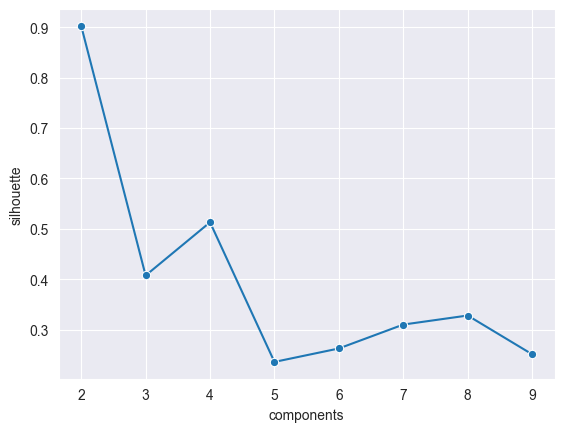

In [126]:
# напишем функцию для подсчета коэффициента силуэта
def get_silhouette(components_num, X):
    mix_Gaus = mixture.GaussianMixture(n_components=components_num, random_state=42)
    mix_Gaus.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким компонентам вероятно относятся объекты
    silhouette = metrics.silhouette_score(X, mix_Gaus.predict(X))
    return silhouette

# создадим пустой словарь, ключами силуэт и количество компонент
silhouette_res = {"silhouette": [], "components": []}



for components_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(components_num, X_pca))
    silhouette_res["components"].append(components_num)
    
# сохраним в датафрейм значение силуэта и количество компонент
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества компонент
sns.lineplot(data=silhouette_df, x="components", y="silhouette", marker= "o")

In [127]:
# Так как в наших данных есть аномалии от которых мы не можем избавиться так как они описывают наши регионы попробуем гауссову смесь
mix_Gaus = mixture.GaussianMixture(n_components=4, random_state=42)
new_component = mix_Gaus.fit(X_pca)
new_predict = new_component.predict(X_pca)
new_predict

array([3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0,
       3, 3, 0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 2, 3, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 3, 0, 0, 2, 2, 0, 1, 3, 0],
      dtype=int64)

In [128]:
new_series = pd.Series(new_predict, index=region_database['region'])
display(new_series[new_series == 0])

region
Амурская область         0
Архангельская область    0
Астраханская область     0
Белгородская область     0
Брянская область         0
                        ..
Хабаровский край         0
Чеченская Республика     0
Чувашская Республика     0
Ярославская область      0
г. Севастополь           0
Length: 62, dtype: int64

In [129]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(X_pca, labels=new_predict):.3f}")    
print(f"Calinski harabasz Coefficient: {metrics.calinski_harabasz_score(X_pca, labels=new_predict):.3f}") 
print(f"Davies bouldin Coefficient: {metrics. davies_bouldin_score(X_pca, labels=new_predict):.3f}")

Silhouette Coefficient: 0.513
Calinski harabasz Coefficient: 162.250
Davies bouldin Coefficient: 0.644


Вывод по данному алгоритму:**Он приблизительно равен kmeans++**

<AxesSubplot: xlabel='eps', ylabel='silhouette'>

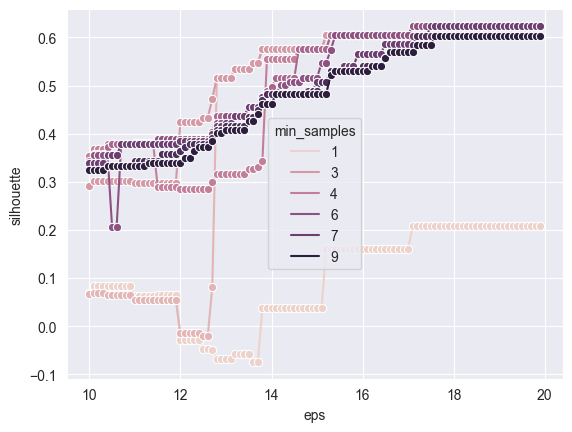

In [130]:
# Попробуем еще одну модель устойчивую к шуму и выбросам DBSCAN
def get_silhouette(eps, min_samples, X):
    db_scan =  cluster.DBSCAN(eps=eps, min_samples=min_samples)
    new_db = db_scan.fit_predict(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = metrics.silhouette_score(X, new_db)
    return silhouette

# создадим пустой словарь, ключами будут расстояние и минимальное колл-во точек
silhouette_res = {"silhouette": [], "eps": [], "min_samples": []}



for eps in np.arange(10,20,0.1):
    for min_samples in range(1,10,1):
        silhouette_res["silhouette"].append(get_silhouette(eps, min_samples, X_pca))
        silhouette_res["eps"].append(eps)
        silhouette_res["min_samples"].append(min_samples)
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="eps", y="silhouette", hue="min_samples", marker= "o")

In [131]:
sdf = silhouette_df.groupby('min_samples').max()
sdf

silhouette   eps
min_samples                  
1              0.207450  19.9
2              0.623779  19.9
3              0.623779  19.9
4              0.623779  19.9
5              0.623779  19.9
6              0.623779  19.9
7              0.623779  19.9
8              0.602589  19.9
9              0.602589  19.9

In [132]:
# Возьмем модель с лучшими настройками
db_scan =  cluster.DBSCAN(eps=19.9, min_samples=2)
new_db = db_scan.fit_predict(X_pca)
new_db

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0, -1, -1,  0],
      dtype=int64)

In [133]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(X_pca, labels=new_db):.3f}")    
print(f"Calinski harabasz Coefficient: {metrics.calinski_harabasz_score(X_pca, labels=new_db):.3f}") 
print(f"Davies bouldin Coefficient: {metrics. davies_bouldin_score(X_pca, labels=new_db):.3f}")

Silhouette Coefficient: 0.624
Calinski harabasz Coefficient: 14.267
Davies bouldin Coefficient: 1.844


Вывод: **Данная модель показала плохие метрики двигаемся дальше**

<AxesSubplot: xlabel='clusters', ylabel='silhouette'>

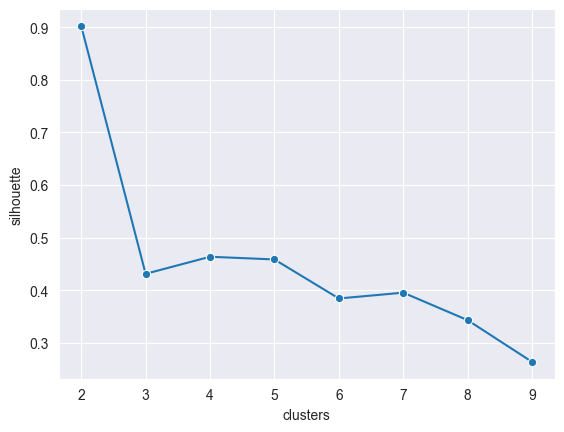

In [134]:
# Попробуем еще одну модель устойчивую к шуму и выбросам AglomerativeClustering
def get_silhouette(clusters, X):
    ag_cluster =  cluster.AgglomerativeClustering(n_clusters=clusters)
    pred = ag_cluster.fit_predict(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = metrics.silhouette_score(X, pred)
    return silhouette

# создадим пустой словарь, ключами будут кластеры и 
silhouette_res = {"silhouette": [], "clusters": []}



for clusters in range(2,10):
    silhouette_res["silhouette"].append(get_silhouette(clusters, X_pca))
    silhouette_res["clusters"].append(clusters)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества компонент
sns.lineplot(data=silhouette_df, x="clusters", y="silhouette", marker= "o")

In [135]:
# Возьмем лучшую модель
ag_cluster =  cluster.AgglomerativeClustering(n_clusters=4, linkage='average')
fit_ac = ag_cluster.fit(X_pca)
pred = ag_cluster.fit_predict(X_pca)
pred 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 2, 0],
      dtype=int64)

In [136]:
new_series = pd.Series(fit_ac.labels_, index=region_database['region'])
display(new_series[new_series == 2])

region
Московская область    2
г. Санкт-Петербург    2
dtype: int64

In [137]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(X_pca, labels=pred):.3f}")    
print(f"Calinski harabasz Coefficient: {metrics.calinski_harabasz_score(X_pca, labels=pred):.3f}") 
print(f"Davies bouldin Coefficient: {metrics. davies_bouldin_score(X_pca, labels=pred):.3f}")

Silhouette Coefficient: 0.586
Calinski harabasz Coefficient: 103.087
Davies bouldin Coefficient: 0.375


Вывод: 
>Модель работает очень слабо по сравнению с остальными моделями

C:\Users\Алексей\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

C:\Users\Алексей\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning:

Exited at iteration 2000 with accuracies 
[5.11858417e-15 3.30370962e-07 5.66925422e-06]
not reaching the requested tolerance 1.2665987014770508e-06.
Use iteration 1694 instead with accuracy 
7.17254353088903e-07.


C:\Users\Алексей\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning:

Exited postprocessing with accuracies 
[4.54770769e-15 2.63280031e-07 1.88848295e-06]
not reaching the reque

<AxesSubplot: xlabel='clusters', ylabel='silhouette'>

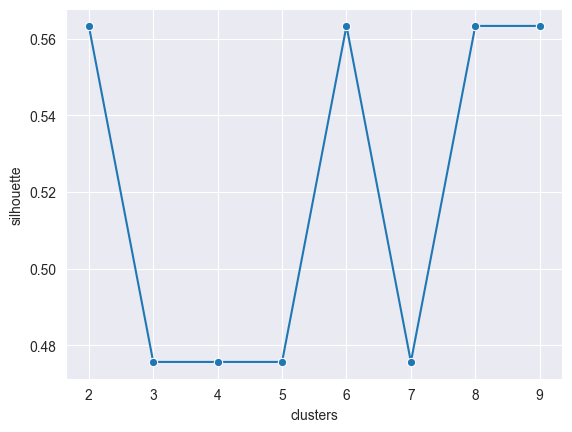

In [138]:
# Попробуем еще одну модель устойчивую к шуму и выбросам SpectralClustering
def get_silhouette(clusters, X):
    birch =  cluster.SpectralClustering(n_clusters=clusters)
    pred = birch.fit_predict(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = metrics.silhouette_score(X, pred)
    return silhouette

# создадим пустой словарь, ключами будут кластеры 
silhouette_res = {"silhouette": [], "clusters": []}



for clusters in range(2,10):
    silhouette_res["silhouette"].append(get_silhouette(clusters, X_pca))
    silhouette_res["clusters"].append(clusters)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества компонент
sns.lineplot(data=silhouette_df, x="clusters", y="silhouette", marker= "o")

In [139]:
# Запусти алгоритм  с лучшими характеристиками
spec_cluster =  cluster.SpectralClustering(n_clusters=7, random_state=42, gamma=0.1, affinity='nearest_neighbors')
fit_spec = spec_cluster.fit(X_pca)
pred = spec_cluster.fit_predict(X_pca)
pred

array([0, 3, 5, 3, 5, 5, 5, 0, 5, 0, 6, 3, 3, 0, 6, 2, 2, 4, 6, 1, 3, 2,
       1, 1, 3, 2, 5, 2, 4, 1, 4, 4, 1, 2, 0, 0, 0, 2, 5, 1, 0, 2, 6, 6,
       1, 3, 0, 6, 6, 2, 4, 2, 6, 6, 4, 2, 1, 6, 2, 1, 5, 1, 0, 4, 1, 2,
       0, 2, 5, 2, 5, 1, 5, 5, 4, 4, 1, 2, 0, 4, 4, 5, 1, 1, 2])

In [140]:
# Посмотрим кластеры
new_series = pd.Series(fit_spec.labels_, index=region_database['region'])
display(new_series[new_series == 6])

region
Еврейская автономная область       6
Кабардино-Балкарская Республика    6
Карачаево-Черкесская Республика    6
Республика Адыгея                  6
Республика Алтай                   6
Республика Ингушетия               6
Республика Калмыкия                6
Республика Марий Эл                6
Республика Мордовия                6
Республика Тыва                    6
dtype: int32

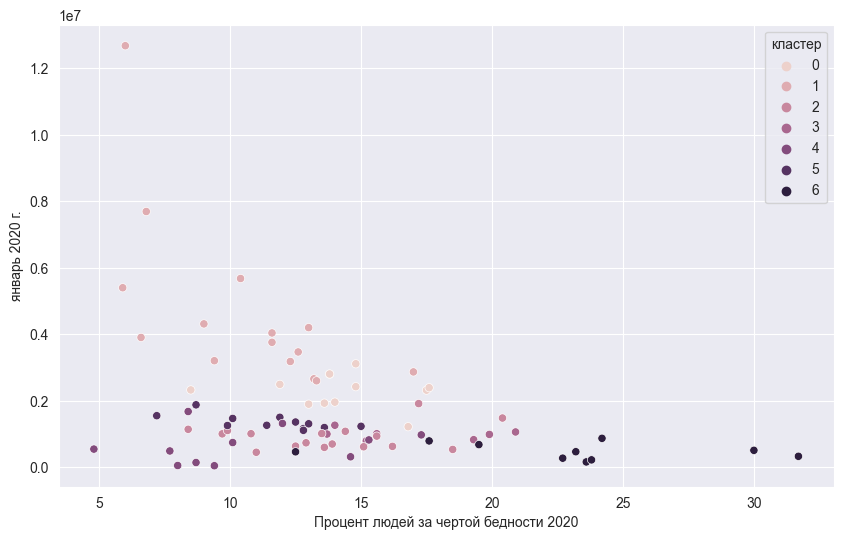

In [141]:
# Для доказательства раюоты модели посмотрим на кластеры визуально
region_database['кластер'] = fit_spec.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=region_database, x='Процент людей за чертой бедности 2020', y='январь 2020 г.', hue='кластер')
plt.show()

Вывод:**Вот наш ярко выраженный 5 кластер доказывает нам что алгоритм работает правильно**

In [142]:
# Посмотрим оценки данного алгоритма
print(f"Silhouette Coefficient: {metrics.silhouette_score(X_pca, labels=pred):.3f}")    
print(f"Calinski harabasz Coefficient: {metrics.calinski_harabasz_score(X_pca, labels=pred):.3f}") 
print(f"Davies bouldin Coefficient: {metrics. davies_bouldin_score(X_pca, labels=pred):.3f}")

Silhouette Coefficient: 0.011
Calinski harabasz Coefficient: 5.063
Davies bouldin Coefficient: 1.443


Вывод: **Метрики у модели хуже предыдущих но самые нуждающиеся регионы выбрал точно они прослеживались вдоль всего разведывательного анализа.Самый иизкий уровень дохода населения, огромный уровень людей за чертой бедности, самый низкий уровень рождаемости и многие другие признаки указывали на это**

## <h1><center>Общий вывод</center></h1>
### Наиболее малообеспеченные и нуждающиеся в дотациях регионы: 
1. Еврейская автономная область       
2. Кабардино-Балкарская Республика    
3. Карачаево-Черкесская Республика    
4. Республика Адыгея                  
5. Республика Алтай                   
6. Республика Ингушетия               
7. Республика Калмыкия                
8. Республика Марий Эл                
9. Республика Мордовия                
10. Республика Тыва 
+ Самый большой процент населения за чертой бедности.
+ Самое маленькое колличество отгружаемой продукции в рублях а значит нехватка работы как таковой.
+ Самая низкая заработная плата по всем регионам
+ Слабая рождаемость и вообще слабый приток населения
### Уязвимые группы населения это люди с низкой заработной платой или вовсе не имеющие нормальной работы живущий в районах где нет каких либо перспектив вообще
